In [69]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [70]:
#Leer vehiculo_procesado.cvs

In [71]:
datos = pd.read_csv('c:/Users/MANOLO/Downloads/vehiculos_procesado.csv', usecols=["consumo", "co2", "cilindros","desplazamiento"])

In [72]:
x = datos.iloc[:, :-1] 
y = datos.iloc[:, 3:4]

In [73]:
x

,desplazamiento,cilindros,consumo
0,2.5,4.0,17
1,4.2,6.0,13
2,2.5,4.0,16
3,4.2,6.0,13
4,3.8,6.0,16
...,...,...,...
35534,1.3,4.0,25
35535,1.1,4.0,26
35536,1.1,4.0,26
35537,1.3,4.0,25


In [74]:
#correlación entre estas variables.
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
datafream = pd.DataFrame(datos, columns=["consumo", "co2", "cilindros","desplazamiento"])
datafream.corr(method=histogram_intersection)

,consumo,co2,cilindros,desplazamiento
consumo,1.0,705921.0,203547.0,117583.8
co2,705921.0,1.0,203547.0,117583.8
cilindros,203547.0,203547.0,1.0,117583.8
desplazamiento,117583.8,117583.8,117583.8,1.0


In [75]:
# Divida el dataset en dos conjuntos uno de entrenamiento y otro de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
type(x_train)

pandas.core.frame.DataFrame

In [76]:
type(y_train)

pandas.core.frame.DataFrame

In [77]:
print(x_test.head())
print(x_train.head())
print(y_test.head())
print(y_train.head())

       desplazamiento  cilindros  consumo
22129             2.0        4.0       23
21173             3.7        6.0       19
4264              3.6        6.0       21
19056             4.0        6.0       16
21250             5.4        8.0       15
       desplazamiento  cilindros  consumo
16037             3.6        6.0       18
1304              5.2       10.0       15
26135             4.0        6.0       16
32316             3.0        6.0       20
10000             4.7        8.0       15
              co2
22129  386.391304
21173  467.736842
4264   423.190476
19056  555.437500
21250  592.466667
              co2
16037  489.000000
1304   592.466667
26135  555.437500
32316  444.350000
10000  592.466667


In [78]:
# Modelo con los datos de entrenamiento
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [79]:
# Predicción con los datos de prueba.
y_pred = regression.predict(x_test)

In [80]:
y_pred

array([[390.85312634],
       [492.60630479],
       [451.77027667],
       ...,
       [410.93424855],
       [583.81573251],
       [410.93424855]])

In [81]:
# Realice una validación cruzada con cv=10
# muestre los score, utilice como métrica a R2
scores=cross_val_score(regression, x, y, cv=10, scoring="r2")
scores

array([0.92348975, 0.92100359, 0.9166913 , 0.92329927, 0.93469489,
       0.92607562, 0.92043394, 0.93057615, 0.92440553, 0.90480354])

In [82]:
# Muestre el promedio de score
scores.mean()

0.9225473584236819

In [83]:
# Encuentre el R2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.933443151310432

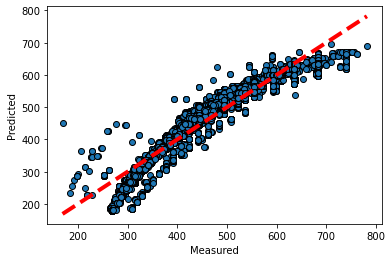

In [84]:
# Dibuje una dispersión de los datos co2 actual vs co2 predicción
predicted = cross_val_predict(regression, x, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()